## To run directly from the site, this must be opened with Anaconda Navigator NOT in terminal jupyter notebook.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# compare to direct link to John Hopkins timeset data 
# dataset has CHANGED location as of 3/23/20
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
covid = pd.read_csv(data, sep=",")

# preview our data
covid.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# extra step to copy file
# if we need to take current downloaded data, can put above step in comments
covid_deaths = covid.copy()
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check that no columns are NaN
covid_deaths.isna().sum().sum()

167

In [5]:
covid_deaths[['Province/State']] = covid_deaths[['Province/State']].fillna('') 
covid_deaths.fillna(0, inplace=True)

In [6]:
# final check for NaN
covid_deaths.isna().sum().sum()

0

In [7]:
today_date = datetime.now().strftime('%m/%d/%y').lstrip("0").replace(" 0", " ")
today_date

'3/24/20'

In [8]:
country_locations = covid_deaths[['Country/Region', 'Lat', 'Long']]
country_locations

,Country/Region,Lat,Long
0,Afghanistan,33.000000,65.000000
1,Albania,41.153300,20.168300
2,Algeria,28.033900,1.659600
3,Andorra,42.506300,1.521800
4,Angola,-11.202700,17.873900
...,...,...,...
236,Timor-Leste,-8.874217,125.727539
237,Belize,13.193900,-59.543200
238,Canada,0.000000,0.000000
239,Laos,19.856270,102.495496


In [9]:
daily_totals = covid_deaths.iloc[:, 4:].max()
daily_totals

1/22/20      17
1/23/20      17
1/24/20      24
1/25/20      40
1/26/20      52
           ... 
3/20/20    4032
3/21/20    4825
3/22/20    5476
3/23/20    6077
3/24/20    6820
Length: 63, dtype: int64

In [10]:
covid_deaths_count = covid_deaths.iloc[:, 4:].sum().max()
covid_deaths_count

18625

In [11]:
current_totals= covid_deaths[['Country/Region',today_date]]
current_totals

,Country/Region,3/24/20
0,Afghanistan,1
1,Albania,5
2,Algeria,19
3,Andorra,1
4,Angola,0
...,...,...
236,Timor-Leste,0
237,Belize,0
238,Canada,0
239,Laos,0


In [12]:
# checking count of country labels to see if any are duplicated
country_list = covid_deaths['Country/Region'].value_counts()
country_list

China                  33
Canada                 13
France                 10
Australia               8
United Kingdom          7
                       ..
Peru                    1
Kuwait                  1
Cyprus                  1
Congo (Brazzaville)     1
Tunisia                 1
Name: Country/Region, Length: 170, dtype: int64

In [13]:
# duplicate countries aggregated
countries_set = set(current_totals['Country/Region'])
country_totals = {'Country': list(countries_set), 'Total': []} 
for country in countries_set:
    df = current_totals[current_totals['Country/Region'] == country]
    country_totals['Total'].append(df[today_date].sum())
country_totals = pd.DataFrame(country_totals)
country_totals = country_totals.set_index('Country')
country_totals

,Total
Country,
Slovenia,4
Tanzania,0
Fiji,0
Paraguay,2
Cuba,1
...,...
Chile,2
Eritrea,0
Suriname,0


In [14]:
populations = pd.read_csv('data/TotalPopulationBySex.csv')
populations = populations[populations["Time"] == 2020]
populations.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
70,4,Afghanistan,2,Medium,2020,2020.5,19976.265,18952.076,38928.341,59.627
151,4,Afghanistan,3,High,2020,2020.5,19976.265,18952.076,38928.341,59.627
232,4,Afghanistan,4,Low,2020,2020.5,19976.265,18952.076,38928.341,59.627
313,4,Afghanistan,5,Constant fertility,2020,2020.5,19976.265,18952.076,38928.341,59.627
394,4,Afghanistan,6,Instant replacement,2020,2020.5,19976.265,18952.076,38928.341,59.627


In [15]:
countries_a = list(country_totals.index)
countries_b = populations['Location'].unique()

shared = [country_name for country_name in countries_a if country_name in countries_b]
not_shared_a = [country_name for country_name in countries_a if country_name not in countries_b]
not_shared_b = [country_name for country_name in countries_b if country_name not in countries_a]

In [16]:
not_shared_a.sort()
not_shared_a

['Bolivia',
 'Brunei',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Diamond Princess',
 'Iran',
 'Korea, South',
 'Laos',
 'Moldova',
 'Russia',
 'Syria',
 'Taiwan*',
 'Tanzania',
 'US',
 'Venezuela',
 'Vietnam']

In [17]:
not_shared_b.sort()
not_shared_b

['Africa',
 'African Group',
 'African Union',
 'African Union: Central Africa',
 'African Union: Eastern Africa',
 'African Union: Northern Africa',
 'African Union: Southern Africa',
 'African Union: Western Africa',
 'African, Caribbean and Pacific (ACP) Group of States',
 'American Samoa',
 'Andean Community',
 'Anguilla',
 'Aruba',
 'Asia',
 'Asia-Pacific Economic Cooperation (APEC)',
 'Asia-Pacific Group',
 'Association of Southeast Asian Nations (ASEAN)',
 'Australia/New Zealand',
 'BRIC',
 'BRICS',
 'Belt-Road Initiative (BRI)',
 'Belt-Road Initiative: Africa',
 'Belt-Road Initiative: Asia',
 'Belt-Road Initiative: Europe',
 'Belt-Road Initiative: Latin America and the Caribbean',
 'Belt-Road Initiative: Pacific',
 'Bermuda',
 'Black Sea Economic Cooperation (BSEC)',
 'Bolivarian Alliance for the Americas (ALBA)',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Botswana',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burundi',
 'Caribbean',
 'Ca

In [18]:
spelling_changes = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
    'Côte d\'Ivoire': 'Cote d\'Ivoire',
    'Gambia': 'Gambia, The',
    'Iran (Islamic Republic of)': 'Iran',
    'Republic of Korea': 'Korea, South',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'China, Taiwan Province of China': 'Taiwan*',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'US',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam'
}

In [19]:
current_populations = {'Country': [], 'Population': []}
for country_name in populations['Location'].unique():
    if country_name in spelling_changes.keys():
        key_name = spelling_changes[country_name]
    elif country_name not in shared:
        continue
    else:
        key_name = country_name
    current_populations['Country'].append(key_name)
    current_populations['Population'].append(populations[populations['Location'] == country_name]['PopTotal'].iloc[0]) 
current_populations = pd.DataFrame(current_populations)
current_populations = current_populations.set_index('Country')
current_populations

,Population
Country,
Afghanistan,38928.341
Albania,2877.800
Algeria,43851.043
Andorra,77.265
Angola,32866.268
...,...
Uzbekistan,33469.199
Venezuela,28435.943
Vietnam,97338.583


In [20]:
country_totals = country_totals.join(current_populations)
country_totals

,Total,Population
Country,,
Slovenia,4,2078.932
Tanzania,0,59734.213
Fiji,0,896.444
Paraguay,2,7132.530
Cuba,1,11326.616
...,...,...
Chile,2,19116.209
Eritrea,0,3546.427
Suriname,0,586.634


In [21]:
country_totals['Death rate'] = country_totals['Total'] / country_totals['Population']
country_totals.sort_values(by=['Death rate'], ascending=False).head(20)

,Total,Population,Death rate
Country,,,
San Marino,21,33.938,0.618775
Italy,6820,60461.828,0.112798
Spain,2808,46754.783,0.060058
Iran,1934,83992.953,0.023026
France,1102,65273.512,0.016883
Netherlands,277,17134.873,0.016166
Switzerland,122,8654.618,0.014097
Andorra,1,77.265,0.012942
Luxembourg,8,625.976,0.012780


In [22]:
country_totals['Total'].sum()

18625

## Finding countries that are missing Population Data

In [23]:
# checking what is missing
country_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Slovenia to Niger
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total       170 non-null    int64  
 1   Population  163 non-null    float64
 2   Death rate  163 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.3+ KB


In [24]:
country_totals.isna().sum()

Total         0
Population    7
Death rate    7
dtype: int64

In [25]:
missing = country_totals[(country_totals['Population'].isna())]
missing

,Total,Population,Death rate
Country,,,
Congo (Kinshasa),2,NaN,NaN
Diamond Princess,10,NaN,NaN
Congo (Brazzaville),0,NaN,NaN
Gambia,1,NaN,NaN
Moldova,1,NaN,NaN
Bahamas,0,NaN,NaN
Laos,0,NaN,NaN


In [26]:
# Deaths total for missing countries
missing['Total'].sum()

14

In [27]:
# Reset dataframe to show all columns
country_totals = country_totals.reset_index()

In [28]:
country_totals

,Country,Total,Population,Death rate
0,Slovenia,4,2078.932,0.001924
1,Tanzania,0,59734.213,0.000000
2,Fiji,0,896.444,0.000000
3,Paraguay,2,7132.530,0.000280
4,Cuba,1,11326.616,0.000088
...,...,...,...,...
165,Chile,2,19116.209,0.000105
166,Eritrea,0,3546.427,0.000000
167,Suriname,0,586.634,0.000000
168,Senegal,0,16743.930,0.000000


In [29]:
country_totals['Total'].sum()

18625

In [30]:
country_totals['Population'].sum()

7459386.501

## Visualizations

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Mortality rate per 1000 people by population')

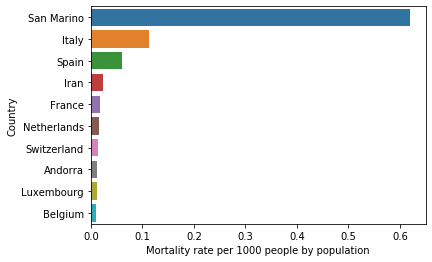

In [32]:
data =country_totals.sort_values(by=['Death rate'], ascending=False).head(10)
sns.barplot(x = "Death rate", y='Country', data=data)
plt.xlabel('Mortality rate per 1000 people by population')

Note about the tiny countries above:
- San Marina is surrounded by Italy.
- Andorra is on the border of Spain and France.

### Looking at top 20 countries by population

Text(0.5, 1.0, 'Top 20 populated countries')

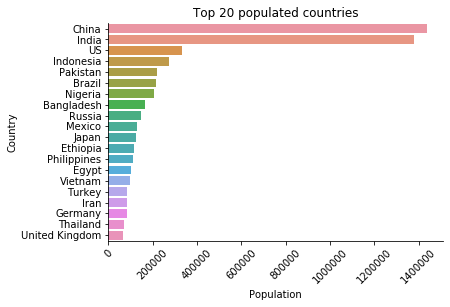

In [33]:
top_20 =country_totals.sort_values(by=['Population'], ascending=False).head(20)

sns.barplot(x = "Population", y='Country', data=top_20)
sns.despine()
plt.xlabel('Population')
plt.xticks(rotation=45)
plt.title("Top 20 populated countries")

Text(0.5, 1.0, 'Covid-19 - Impact to Top 10 populated countries by Mortality Rate')

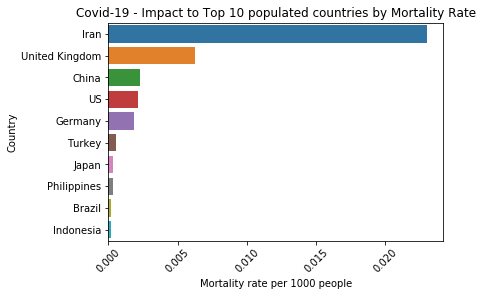

In [34]:
top_20 =country_totals.sort_values(by=['Population'], ascending=False).head(20)
data =top_20.sort_values(by=['Death rate'], ascending=False).head(10)

sns.barplot(x = "Death rate", y='Country', data=data)
plt.xticks(rotation=45)
plt.xlabel('Mortality rate per 1000 people')
plt.title("Covid-19 - Impact to Top 10 populated countries by Mortality Rate")

## Visualizing on a Map

In [35]:
covid_deaths[today_date].sum()

18625

In [36]:
covid_deaths_agg = covid_deaths.groupby('Country/Region').sum().reset_index()
covid_deaths_agg.loc[:, ['Lat', 'Long']] = covid_deaths.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]
covid_deaths_agg

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,Vietnam,16.0000,108.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# filter to cases above 1 death
MIN_CASES = 1
covid_deaths_agg = covid_deaths_agg[covid_deaths_agg.iloc[:, 3:].max(axis=1) >= MIN_CASES]
covid_deaths_agg.head()
 

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
6,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,...,2,2,2,2,3,3,4,4,4,6


In [38]:
# check country/region
covid_deaths_agg['Country/Region'].value_counts()

Guyana       1
China        1
Canada       1
Mexico       1
Mauritius    1
            ..
Jamaica      1
Nigeria      1
Greece       1
Slovenia     1
Brazil       1
Name: Country/Region, Length: 94, dtype: int64

In [39]:
# transpose values for dates using pd.melt
covid_deaths2 = pd.melt(covid_deaths_agg, 
                        id_vars=covid_deaths_agg.iloc[:, :3],
                        var_name="Date",
                        value_vars=covid_deaths_agg.iloc[:, 3:],
                        value_name="Deaths")
print(covid_deaths2.shape)
covid_deaths2.head()

(5922, 5)


,Country/Region,Lat,Long,Date,Deaths
0,Afghanistan,33.0000,65.0000,1/22/20,0
1,Albania,41.1533,20.1683,1/22/20,0
2,Algeria,28.0339,1.6596,1/22/20,0
3,Andorra,42.5063,1.5218,1/22/20,0
4,Argentina,-38.4161,-63.6167,1/22/20,0


In [40]:
# today's total deaths
deaths_totals = covid_deaths2[(covid_deaths2['Date'] == today_date)]
deaths_totals

,Country/Region,Lat,Long,Date,Deaths
5828,Afghanistan,33.000000,65.000000,3/24/20,1
5829,Albania,41.153300,20.168300,3/24/20,5
5830,Algeria,28.033900,1.659600,3/24/20,19
5831,Andorra,42.506300,1.521800,3/24/20,1
5832,Argentina,-38.416100,-63.616700,3/24/20,6
...,...,...,...,...,...
5917,US,37.090200,-95.712900,3/24/20,706
5918,Ukraine,48.379400,31.165600,3/24/20,3
5919,United Arab Emirates,24.000000,54.000000,3/24/20,2
5920,United Kingdom,37.641557,-31.984943,3/24/20,423


In [41]:
# check
deaths_totals['Deaths'].sum()

18625

In [42]:
deaths_totals.sort_values(by='Deaths', ascending=False)

,Country/Region,Lat,Long,Date,Deaths
5876,Italy,43.000000,12.000000,3/24/20,6820
5846,China,32.828385,111.649082,3/24/20,3281
5909,Spain,40.000000,-4.000000,3/24/20,2808
5872,Iran,32.000000,53.000000,3/24/20,1934
5860,France,4.447720,11.603510,3/24/20,1102
...,...,...,...,...,...
5887,Moldova,47.411600,28.369900,3/24/20,1
5888,Montenegro,42.500000,19.300000,3/24/20,1
5921,Zimbabwe,-20.000000,30.000000,3/24/20,1
5879,Kazakhstan,48.019600,66.923700,3/24/20,0


In [43]:
## Show on map - have to install plotly to show this
# import plotly.express as px
# fig = px.scatter_geo(covid_deaths2,
#                     lat="Lat", lon="Long", color="Country/Region",
#                     hover_name="Country/Region", 
#                     size="deaths",
#                     size_max=50, animation_frame="date",
#                     template='plotly_dark', projection="natural earth",
#                     title="COVID-19 worldwide deaths over time")                    
# fig.show()

## Merge files with Population data

In [44]:
# already read population file 
# need to double check this against UN data
# reset index
current_populations = current_populations.sort_values(by='Population', ascending=False).reset_index()
current_populations

,Country,Population
0,China,1439323.774
1,India,1380004.385
2,US,331002.647
3,Indonesia,273523.621
4,Pakistan,220892.331
...,...,...
160,Dominica,71.991
161,Monaco,39.244
162,Liechtenstein,38.137
163,San Marino,33.938


In [45]:
left = deaths_totals
right = current_populations
df = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="Country/Region", right_on="Country")
df

,Country/Region,Lat,Long,Date,Deaths,Country,Population
0,Afghanistan,33.0000,65.0000,3/24/20,1.0,Afghanistan,38928.341
1,Albania,41.1533,20.1683,3/24/20,5.0,Albania,2877.800
2,Algeria,28.0339,1.6596,3/24/20,19.0,Algeria,43851.043
3,Andorra,42.5063,1.5218,3/24/20,1.0,Andorra,77.265
4,Argentina,-38.4161,-63.6167,3/24/20,6.0,Argentina,45195.777
...,...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,97.928
165,NaN,NaN,NaN,NaN,NaN,Dominica,71.991
166,NaN,NaN,NaN,NaN,NaN,Monaco,39.244
167,NaN,NaN,NaN,NaN,NaN,Liechtenstein,38.137


In [46]:
df.isna().sum()

Country/Region    75
Lat               75
Long              75
Date              75
Deaths            75
Country            4
Population         4
dtype: int64

In [47]:
df[df['Deaths'].isna()]

,Country/Region,Lat,Long,Date,Deaths,Country,Population
94,NaN,NaN,NaN,NaN,NaN,Ethiopia,114963.583
95,NaN,NaN,NaN,NaN,NaN,Vietnam,97338.583
96,NaN,NaN,NaN,NaN,NaN,Tanzania,59734.213
97,NaN,NaN,NaN,NaN,NaN,South Africa,59308.690
98,NaN,NaN,NaN,NaN,NaN,Kenya,53771.300
...,...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,NaN,Antigua and Barbuda,97.928
165,NaN,NaN,NaN,NaN,NaN,Dominica,71.991
166,NaN,NaN,NaN,NaN,NaN,Monaco,39.244
167,NaN,NaN,NaN,NaN,NaN,Liechtenstein,38.137


In [48]:
df.dropna(subset=['Deaths'], inplace=True)
df.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Deaths            0
Country           4
Population        4
dtype: int64

In [49]:
df.drop(['Country'], axis=1, inplace=True)
df.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Deaths            0
Population        4
dtype: int64

In [50]:
df[df['Population'].isna()]

,Country/Region,Lat,Long,Date,Deaths,Population
20,Congo (Kinshasa),-4.0383,21.7587,3/24/20,2.0,NaN
27,Diamond Princess,0.0000,0.0000,3/24/20,10.0,NaN
34,Gambia,13.4432,-15.3101,3/24/20,1.0,NaN
59,Moldova,47.4116,28.3699,3/24/20,1.0,NaN


In [51]:
df['Deaths'].sum()

18625.0

## Merge with Other File

In [56]:
# read in EIU raw_data after running script
# don't know what this is
EIU = pd.read_csv("test.csv", sep=",")
EIU.head()

,Country name,Overall Score,Rank,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties
0,Norway,9.87,1,10.00,9.64,10.00,10.00,9.71
1,Iceland,9.58,2,10.00,9.29,8.89,10.00,9.71
2,Sweden,9.39,3,9.58,9.64,8.33,10.00,9.41
3,New Zealand,9.26,4,10.00,9.29,8.89,8.13,10.00
4,Finland,9.25,5,10.00,8.93,8.89,8.75,9.71
